In [59]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.pyplot import axes
import scipy
from scipy import signal

In [60]:
import numpy as np

In [61]:
import math
#import math.exp as exp

In [62]:
import astropy
from astropy.io import fits

In [63]:
fitspec = fits.open('spec-1373-53063-0583.fits')

In [64]:
data =  fitspec[1].data
x_dat = data['loglam']
y_dat = data['flux'] - data['model']
x_dat = 10**x_dat

In [65]:
len(x_dat)

3833

In [66]:
len(y_dat)

3833

In [67]:
SII = 6718.2943
SII_2 = 6732.68
NII = 6549.86
NII_2 = 6585.27
H_alpha = 6564.6140

In [68]:
a = 24 #intensity
b = 6564.6140 #mean
c = 1 #sigma

In [69]:
def gaussian(x, a, b, c):
    return a*math.exp(-((x-b)**2)/(2*c**2))
gaussian = np.vectorize(gaussian)

In [70]:
x = np.linspace(x_dat[1],x_dat[len(x_dat)-1],len(x_dat))

In [71]:
y1 = gaussian(x, a, b, c)
y2 = gaussian(x, 5, SII, c)
y3 = gaussian(x, 5, SII_2, c)
y4 = gaussian(x, 3, NII, c)
y5 = gaussian(x, 8, NII_2, c)

In [72]:
x_test = np.linspace(x_dat[1],x_dat[len(x_dat)-1],len(x_dat))
y_test = y1+y2+y3+y4+y5

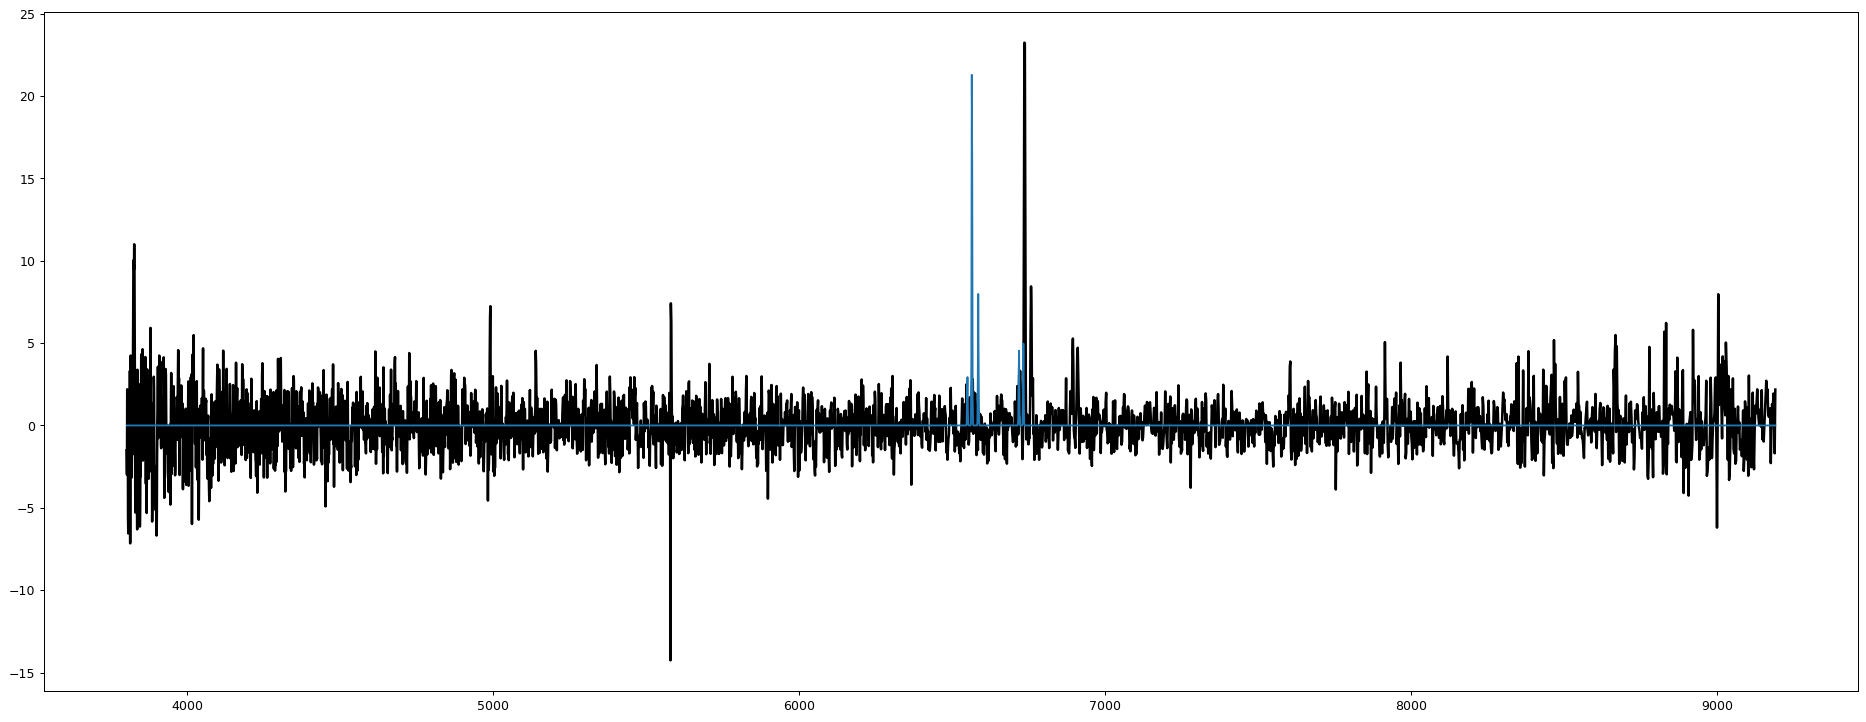

In [73]:
figure(figsize=(26, 10), dpi=90)
y_dat_med = scipy.signal.medfilt(y_dat, kernel_size=81)
y_smoothed = y_dat-y_dat_med
plt.plot(x_dat, y_smoothed, color='black', linewidth=2)
plt.plot(x_test,y_test)

In [74]:
y_dat_med = scipy.signal.medfilt(y_dat, kernel_size=81)
y_smoothed = y_dat-y_dat_med

In [75]:
corr_test = scipy.signal.correlate(y_test, y_test, mode='full', method='direct') #?

In [76]:
corr_test

array([0., 0., 0., ..., 0., 0., 0.])

In [77]:
x_steps_test = np.linspace(0,len(corr_test),len(corr_test))
y_sum_test = corr_test

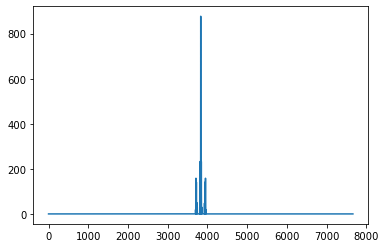

In [78]:
fig, ax = plt.subplots()
plt.plot(x_steps_test,y_sum_test)
#ax.set_xbound(4300, 4400)

In [80]:
maxline = list(y_sum_test).index(max(list(y_sum_test)))
x_steps_test[maxline]
#должно быть 3832

3832.5